# Homework_2023_03_27 Numpy基本操作、SVD奇异值分解

教师：胡俊峰

助教：李一飞 朱成轩

本次作业总分为12分，达到10分即为满分，另外2分是附加分。

如对本次作业有任何疑问，请在课程大群、技术问题交流群中提出或联系负责助教.


In [2]:
%%!
# 安装需要的python包
pip install pillow numpy matplotlib

["'#' 不是内部或外部命令，也不是可运行的程序", '或批处理文件。']

## 第零部分：请认真阅读代码，理解numpy相关基本操作

In [4]:
import numpy as np

a0 = np.array([[1,2,3],[4,5,6]])
b0 = np.array([[10],[20]])
print(a0+b0)
a1 = np.arange(30).reshape(2, 3, 5)
b1 = np.arange(3).reshape(3, 1)
print(a1+b1)
a2 = np.arange(48).reshape(8, 1, 6, 1)
b2 = np.arange(35).reshape(   7, 1, 5)
print((a2*b2).shape)

[[11 12 13]
 [24 25 26]]
[[[ 0  1  2  3  4]
  [ 6  7  8  9 10]
  [12 13 14 15 16]]

 [[15 16 17 18 19]
  [21 22 23 24 25]
  [27 28 29 30 31]]]
(8, 7, 6, 5)


### 0.2 Operation on a given axis

In [5]:
a0 = np.arange(6).reshape(2,3)
# [[0,1,2],
#  [3,4,5]]
print(np.mean(a0))
print(np.max(a0, axis=0))
print(np.argmax(a0, axis=0))
print(np.min(a0, axis=1))

2.5
[3 4 5]
[1 1 1]
[0 3]


### 0.3 Manipulating shape

In [6]:
a = np.arange(6)
a.resize(3, 2)
## Notice the difference between reshape and resize!
# `resize` modifies the array in-place, and does not return values.
a.reshape(2, 3) 
# `reshape` only returns the reshaped result, and does not change the array.
print(a.shape)
a = a.reshape(2, 3)
print(a.shape)
a = a.reshape(-1, 2) 
# `-1' means that the value is inferred from the length of the array and remaining dimensions.
print(a)
# [[0 1]
#  [2 3]
#  [4 5]]
a = a.T
print(a)
# [[0 2 4]
#  [1 3 5]]
print(a.ravel()) # default order: C (for C/C++ order)
# A flattened array, `order` can be specified.
print(a.ravel('F')) # Fortran-style order

(3, 2)
(2, 3)
[[0 1]
 [2 3]
 [4 5]]
[[0 2 4]
 [1 3 5]]
[0 2 4 1 3 5]
[0 1 2 3 4 5]


### 0.4 numpy.dot
进一步探索细节请查阅[文档](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

In [7]:
import numpy as np

a0 = np.random.rand(30)
b0 = np.arange(30)/30
dot0 = np.dot(a0, b0)
print(a0.shape, b0.shape, dot0.shape, (a0@b0).shape, sep='\t\t')
# Equivalent to inner product for 1D array
assert(np.inner(a0, b0) == dot0)
a1 = a0.reshape(-1, 5)
b1 = b0.reshape(5, -1)
dot1 = np.dot(a1, b1)
assert((np.matmul(a1, b1) == dot1).all)
# Matrix multiplication, `np.matmul(a1, b1)` or `a1 @ b1` is preferred.
print(a1.shape, b1.shape, dot1.shape, (a1@b1).shape, sep='\t\t')
a2 = a1
b2 = b1[..., 0]
dot2 = np.dot(a2, b2)
print(a2.shape, b2.shape, dot2.shape, (a2@b2).shape, sep='\t\t')
a3 = a0.reshape(2, -1, 5)
b3 = b0.reshape(2, 5, -1)
dot3 = np.dot(a3, b3)
# This is a bit counter-intuitive, so use `np.dot` carefully. ^_^
print(a3.shape, b3.shape, dot3.shape, (a3@b3).shape, sep='\t')

(30,)		(30,)		()		()
(6, 5)		(5, 6)		(6, 6)		(6, 6)
(6, 5)		(5,)		(6,)		(6,)
(2, 3, 5)	(2, 5, 3)	(2, 3, 2, 3)	(2, 3, 3)


## 第一部分：基础练习

### 1.1 numpy矩阵操作（1分）

首先请你**依次**创建矩阵$A, B, C, D$，它们都是服从标准正态分布的矩阵，其中$A$的大小为$20\times 40$，$B$的大小为$40\times 40$，$C$的大小为$40\times 1$, $D$的大小为$40 \times 1$。

In [13]:
import numpy as np
np.random.seed(1)

# 作业：添加你的代码

A = np.random.randn(20,40)
B = np.random.randn(40,40)
C = np.random.randn(40,1)
D = np.random.randn(40,1)
# print(A)
# print(B)
# print(C)
# print(D)

# 测试
assert A.shape == (20, 40)
assert (A[0][0] - 1.6243453 < 1e-4)
assert(B.shape == (40, 40))
assert(C.shape == (40, 1))
assert(D.shape == (40, 1))

### 1.2 numpy矩阵运算（1分）
计算$A+A$, $AA^\top$, $A^\top A$, $AB$。然后写一个函数对于输入参数$\lambda$，计算$A(B-\lambda I)$。

In [22]:
# 作业：添加你的代码

# A + A
matrix_1 = A + A

# AA^T
matrix_2 = A @ A.T

# A^TA
matrix_3 = A.T @ A

# AB
matrix_4 = A @ B

# func()
def func(lam):
    return A @ (B - lam * np.eye(40))


# 测试
assert(matrix_2[0][0] - 37.539142 < 1e-4)
assert(matrix_3[0][0] - 18.29059745 < 1e-4)
assert(func(0)[0][0] == matrix_4[0][0])

### 1.3 numpy求解线性方程组（1分）

利用numpy库求解以下方程组：

 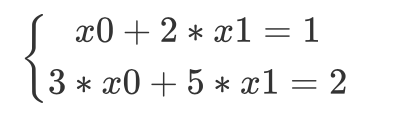

In [30]:
# 作业：添加你的代码

a = np.mat(
    '1,2; 3,5')  # 系数矩阵

b = np.mat(
    '1, 2').T  # 常数项
x = np.linalg.solve(a, b)  # 方程组的解
print(x)

[[-1.]
 [ 1.]]


### 1.4 向量范数与矩阵范数（1分）

#### 向量范数

    1-范数：即向量元素绝对值之和，matlab调用函数norm(x, 1) 。
    2-范数：Euclid范数（欧几里得范数，常用计算向量长度），即向量元素绝对值的平方和再开方，matlab调用函数norm(x, 2)。

#### 矩阵范数

    1-范数：列和范数，即所有矩阵列向量绝对值之和的最大值，matlab调用函数norm(A, 1)。
    2-范数：为最大特征值。即A'A矩阵的最大特征值的开平方。matlab调用函数norm(x, 2)。

请计算$A$的2-范数$\Vert A\Vert_2$和B的1-范数。

In [33]:
# 作业：添加你的代码

norm_a = np.linalg.norm(A, ord=2)
norm_b = np.linalg.norm(B, ord=1)

print(norm_a)
print(norm_b)

assert(norm_a - 10 < 1)
assert(norm_b - 40 < 1)

10.102466521578586
40.99388139873708


### 1.5 矩阵特征值（2分）

numpy的矩阵特征值计算提供了两组函数，一组用于通用的矩阵，一组用于赫米特矩阵。另外，每组中又包含两个函数，分别用于只计算特征值，以及特征向量。

1. `w, v = np.linalg.eig(a)`，计算一个方阵的特征值和特征向量，其中特征向量v是归一化后的向量。
2. `w, v = np.linalg.eigh(a, UPLO='L')`，用于赫米特矩阵的特征值计算。其中`UPLO`的取值`L`与`U`分别表示计算时采用`a`的下三角还是上三角矩阵。
3. `w = np.linalg.eigvals(a)`，与1.的最大差别就是没有计算特征向量。
4. `w = np.linalg.eigvalsh(a)`，与2.的最大差别就是没有计算特征向量。

请求解 $AA^\top$ 的特征值的最大和最小值以及对应的特征向量。

In [46]:
# 作业：添加你的代码
# matrix_2
w, v = np.linalg.eig(matrix_2)  # 特征值和特征向量
#print(w,v)
eig_val_max = max(w)  # 最大特征值
eig_val_min = min(w)  # 最小特征值
eig_vec_max = np.array([v[i][j] for i in range(len(v)) for j in range(len(v[0])) if w[j] == eig_val_max])  # 最大特征值对应的特征向量
eig_vec_min = np.array([v[i][j] for i in range(len(v)) for j in range(len(v[0])) if w[j] == eig_val_min])  # 最小特征值对应的特征向量

print(eig_val_max)
print(eig_val_min)
print(eig_vec_max)
print(eig_vec_min)

# 测试
assert(eig_val_max - 102 < 1)
assert(eig_val_min - 3.757 < 1)
assert((eig_val_max * eig_vec_max)[0] - (np.dot(np.dot(A, A.T), eig_vec_max))[0] < 1e-4)

102.05982981961613
3.7573802504734353
[-0.39727363 -0.09646065 -0.07510433 -0.00466194 -0.02359499  0.3030558
  0.03340732  0.22018462 -0.02119567  0.17705668  0.37728434  0.08339618
 -0.17462848 -0.14912908  0.31354848  0.30960911  0.31868595 -0.23348993
  0.31444258 -0.04749289]
[ 1.75283796e-01  1.58013263e-01 -9.49323791e-02  1.82880826e-01
  2.74760438e-01 -4.37249871e-02 -3.23670241e-01  3.46978039e-01
  3.48110603e-01  1.42496490e-01  5.01022194e-02 -1.01423517e-01
 -3.60260920e-04 -2.96402037e-02 -1.92459023e-01  7.53436166e-02
  3.56038853e-01 -1.00206480e-01 -3.71381664e-01 -3.55921528e-01]




### 1.6 奇异值分解（SVD）

SVD将原始的矩阵$Data$分解成三个矩阵$U$,$\Sigma$,和$V^\top$，如果原始矩阵$Data$是$m$行$n$列，那么$U$,$\Sigma$,和$V^\top$就分别是$m$行$m$列、$m$行$n$列和$n$行$n$列。

为了清晰起见，上述过程可以写成如下一行：$$Data_{m\times n}=U_{m\times m}\Sigma_{m \times n}V^\top_{n\times n}$$

上述分解中会构建出一个矩阵$\Sigma$，该矩阵只有对角元素，其他元素均为0. 另一个惯例就是，$\Sigma$的对角元素是从大到小排列的。这些对角元素称为奇异值（Singular Value），它们就是矩阵$Data \cdot Data^{\top}$特征值的平方根。

在科学工程中，一直存在这样一个普遍事实：在某个奇异值的数目（$r$个）之后，其他的奇异值都置为0.这就意味着数据集中仅有$r$个重要特征，而其余特征则都是噪声或冗余特征。

我们来看一个例子：

In [48]:
data = np.array([[1, 1, 1, 0, 0],
        [2, 2, 2, 0, 0],
        [1, 1, 1, 0, 0],
        [5, 5, 5, 0, 0],
        [1, 1, 0, 2, 2],
        [0, 0, 0, 3, 3],
        [0, 0, 0, 1, 1]],dtype='float')

U, Sigma, VT = np.linalg.svd(data)
print(Sigma)

[9.72140007e+00 5.29397912e+00 6.84226362e-01 1.47215266e-15
 1.23121789e-31]


可以看到矩阵$\Sigma$是以对角线元素组成的行向量返回。
$\Sigma$中前3个数值比其他的值大了很多，所以我们就可以用如下结果来近似原矩阵：
$$Data_{m\times n}\approx U_{m\times 3}\Sigma_{3 \times 3}V^\top_{3\times n}$$

#### 1.6.1 请你实现用三个奇异值来近似data矩阵的代码（2分）

In [49]:
# TODO
data_sim = U[:, 0:3] @ np.diag(Sigma[0:3]) @ VT[0:3, :]

assert data.shape == data_sim.shape
assert np.sum((data-data_sim)**2) < 2e-2

我们是如何知道仅需保留3个奇异值的呢？确定要保留的奇异值的数目有很多启发式策略，其中一个典型的做法就是保留矩阵中90%的能量信息。

为了计算总能量信息，我们将所有的奇异值平方后求和。于是可以将奇异值的平方和累加到总值的90%为止。

接下来我们来看一个将SVD应用于图像压缩的例子。

### 基于SVD的图像压缩 + 不同个数的特征值对应能保留的能量占比 

In [51]:
import numpy as np
from PIL import Image

img = Image.open("lena.jpeg")  # 加载图片
arr = np.array(img)  # [height, width] 灰度图只有一个通道
print(arr.shape)

(512, 512)


#### 1.6.2 对图片进行SVD分解，然后保留前numSV个奇异值，获得近似图片（2分）
下面代码框架仅为参考，可以自行设计，实现功能即可

In [56]:
# 保留前numSV个奇异值
def compress(arr, numSV):
    # TODO
    u, sigma, v = np.linalg.svd(arr)
    arr = u[:, 0:numSV] @ np.diag(sigma[0:numSV]) @ v[0:numSV, :]
    return arr

new_im = compress(arr, 50)
new_im = Image.fromarray(np.uint8(new_im))
new_im.show()

## 第二部分 进阶练习
### 2.1 基于numpy向量化运算实现K-Means聚类算法
向量化运算（Vectorization）是一种重要的思想，其优点在于可以以向量为单位，批量处理数据，具有比循环操作更高的执行效率。

K-Means算法是一个经典的无监督聚类算法，目的是将给定的N个样本划分为k类，每类所属样本距离其质心的距离最小。其大致流程如下：
1. 随机选取k个质心（k值取决于你想聚成几类）
2. 计算样本到质心的距离，距离质心距离近的归为一类，分为k类
3. 求出分类后的每类的新质心
4. 再次计算计算样本到新质心的距离，距离质心距离近的归为一类
5. 判断新旧聚类是否相同，如果相同就代表已经聚类成功，如果没有就循环2-4步骤直到相同

为了便于大家实现，本次作业首先给出基于循环版本实现的聚类算法；同学们需要自己实现numpy向量化操作对其进行优化的部分，并观察时间效率上的提升。

下面是循环实现版本：

2023-03-29 12:56:03  iter: 10
2023-03-29 12:56:06  iter: 20
2023-03-29 12:56:08  iter: 30
2023-03-29 12:56:11  iter: 40
2023-03-29 12:56:14  iter: 50
2023-03-29 12:56:17  iter: 60
2023-03-29 12:56:20  iter: 70
2023-03-29 12:56:23  iter: 80
2023-03-29 12:56:26  iter: 90
2023-03-29 12:56:29  iter: 100
总用时: 31.5853009223938 秒


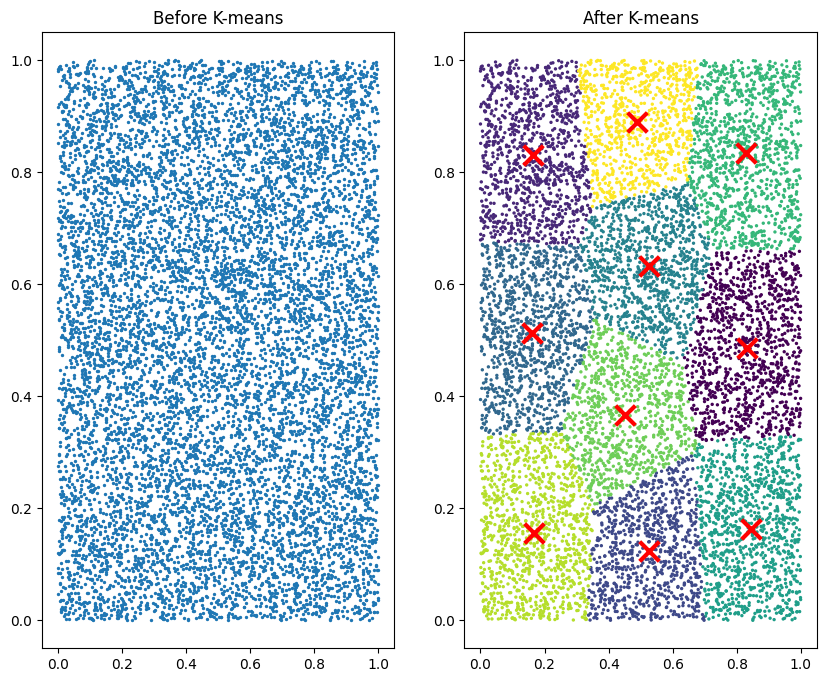

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt


def get_time():
    return time.strftime('%Y-%m-%d %H:%M:%S ',time.localtime())


np.random.seed(123)  # 设置随机种子，保证每次运行结果一致

# 生成数据
X = np.random.rand(10000, 2)


# 循环实现版本
def k_means_loop(X, K, max_iters=100):
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    
    for iter in range(max_iters):
        if (iter+1) % 10 == 0:
            print(get_time(), "iter:", iter+1)
        # assign each data point to its nearest centroid
        clusters = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = np.sqrt(np.sum(np.square(X[i, :] - centroids), axis=1))
            clusters[i] = np.argmin(distances)
        # recompute centroids as the mean of the data points in each cluster
        for k in range(K):
            centroids[k, :] = np.mean(X[clusters == k, :], axis=0)
    return clusters, centroids


t0 = time.time()  # 记录开始时间
clusters, centroids = k_means_loop(X, K=10)  # 调用函数
t1 = time.time()  # 记录结束时间
print(f"总用时: {t1 - t0} 秒")


# plot data before K-means clustering
plt.rcParams['figure.figsize'] = (10, 8)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('Before K-means')

# plot data after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('After K-means')

# show the plot
plt.show()

接下来，请补全k_means_vectorized函数，实现向量化版本的K-means算法。（2分）

2023-03-29 12:55:40  iter: 10
2023-03-29 12:55:40  iter: 20
2023-03-29 12:55:40  iter: 30
2023-03-29 12:55:41  iter: 40
2023-03-29 12:55:41  iter: 50
2023-03-29 12:55:41  iter: 60
2023-03-29 12:55:41  iter: 70
2023-03-29 12:55:41  iter: 80
2023-03-29 12:55:41  iter: 90
2023-03-29 12:55:41  iter: 100
总用时: 2.002288818359375 秒


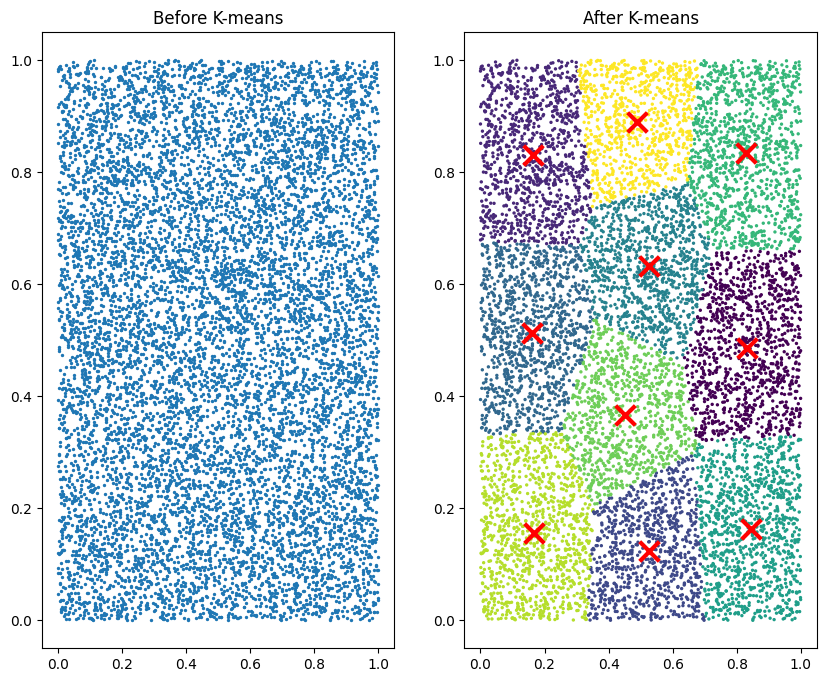

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt


def get_time():
    return time.strftime('%Y-%m-%d %H:%M:%S ',time.localtime())


np.random.seed(123)  # 设置随机种子，保证每次运行结果一致

# 生成数据
X = np.random.rand(10000, 2)


# 向量化实现版本
def k_means_vectorized(X, K, max_iters=100):
    
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

    for iter in range(max_iters):
        if (iter+1) % 10 == 0:
            print(get_time(), "iter:", iter+1)

        # assign each data point to its nearest centroi
        distances = []
        for i in range(K):
            distances.append(np.array(np.linalg.norm(centroids[i]-X, axis=1))) # TODO
        distances = np.array(distances)
        clusters = np.argmin(distances, axis=0)
        #print(clusters)

        # recompute centroids as the mean of the data points in each cluster
        for k in range(K):
            centroids[k, :] = np.mean(X[clusters == k, :], axis=0)# TODO

    return clusters, centroids


t0 = time.time()  # 记录开始时间
clusters, centroids = k_means_vectorized(X, K=10)  # 调用函数
t1 = time.time()  # 记录结束时间
print(f"总用时: {t1 - t0} 秒")


# plot data before K-means clustering
plt.rcParams['figure.figsize'] = (10, 8)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('Before K-means')

# plot data after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('After K-means')

# show the plot
plt.show()